In [16]:
# Imports for data analysis
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from datetime import datetime
import seaborn as sns
from pprint import pprint


In [42]:
# read csv
df_crash = pd.read_csv("../Resources/People_Involved.csv")
df_crash = df_crash.sort_values(by = "Case Date")
df_crash = df_crash.drop("Unnamed: 0", axis= 1)
df_crash.head()

,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County
122,450001,35,1,Black,"Second Seat, Middle",False,True,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43)
120,450001,36,1,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Not Reported,Not Reported,Not Reported,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43)
121,450001,38,1,Not a Fatality (not Applicable),"Second Seat, Left Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43)
35,310001,999,9,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Unknown,Unknown (Police Reported),Test Not Given,2017-01-01,Unknown Make,"Unknown Make Unknown (as to automobile, motore...",9999,Nebraska,SCOTTS BLUFF (157)
123,450001,27,1,Not a Fatality (not Applicable),"Second Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43)


In [18]:
#check length of csv
len(df_crash)

188245

In [19]:
df_crash["Case Year"] = df_crash["Case Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime("%Y"))
df_crash.head()

,Unnamed: 0,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Case Year
122,122,450001,35,1,Black,"Second Seat, Middle",False,True,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
120,120,450001,36,1,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Not Reported,Not Reported,Not Reported,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
121,121,450001,38,1,Not a Fatality (not Applicable),"Second Seat, Left Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
35,35,310001,999,9,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Unknown,Unknown (Police Reported),Test Not Given,2017-01-01,Unknown Make,"Unknown Make Unknown (as to automobile, motore...",9999,Nebraska,SCOTTS BLUFF (157),2017
123,123,450001,27,1,Not a Fatality (not Applicable),"Second Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017


In [20]:
print(len(df_crash.groupby(["Case Year", "St Case Num", "State"])))

133307


<h1>1. Gender Analysis</h1>

In [21]:
#checking values
df_crash["Sex"].value_counts()

Sex
1    125612
2     57735
9      3379
8      1519
Name: count, dtype: int64

In [22]:
# remove the unknown and weird numbers
df_crash = df_crash[(df_crash["Sex"] == 1) | (df_crash["Sex"] == 2)]

#convert sex names to actual names, male = 1, female = 2
df_crash.loc[:, "Sex"] = df_crash["Sex"].replace({1: "Male", 2: "Female"})
df_crash.head()

,Unnamed: 0,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Case Year
122,122,450001,35,Male,Black,"Second Seat, Middle",False,True,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
120,120,450001,36,Male,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Not Reported,Not Reported,Not Reported,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
121,121,450001,38,Male,Not a Fatality (not Applicable),"Second Seat, Left Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
123,123,450001,27,Male,Not a Fatality (not Applicable),"Second Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
124,124,450001,40,Male,Not a Fatality (not Applicable),"Front Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017


<h3>1a. Fatality Pie Chart by Sex</h3>

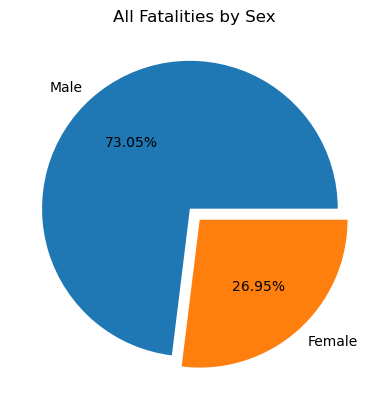

In [23]:
#Get the number of fatal cases of males and females 
num_fatal_male = len(df_crash[(df_crash["Sex"] == "Male") & (df_crash["Is Fatal"] == True)])
num_fatal_female = len(df_crash[(df_crash["Sex"] == "Female") & (df_crash["Is Fatal"] == True)])

labels = ["Male", "Female"]
values = [num_fatal_male, num_fatal_female]
explode = [0.05, 0.05]

plt.pie(values, labels=labels, autopct="%.2f%%", explode= explode)
plt.title("All Fatalities by Sex")
plt.show()

<h3>1b. Fatality Rate Per Sex Category</h3>

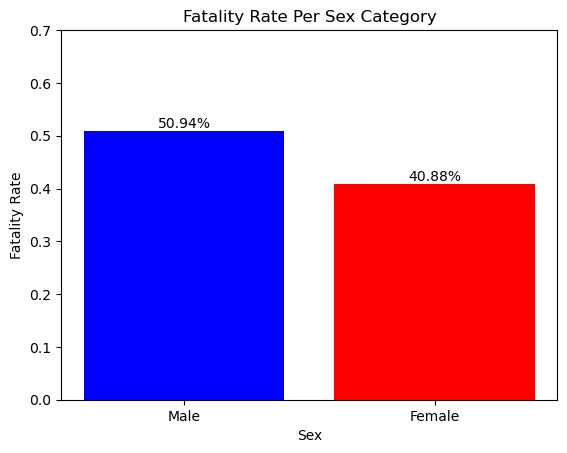

In [24]:
# Total number of female and male
num_female = len(df_crash[df_crash["Sex"]== "Female"])
num_male = len(df_crash[df_crash["Sex"] == "Male"])

# Male and female fatality rates
fatality_rate_male = num_fatal_male/num_male
fatality_rate_female = num_fatal_female/num_female

# labels for bar graph
x_labels = ["Male", "Female"]
fatality_rates = [fatality_rate_male, fatality_rate_female]

#plot the graphs
plt.bar(x_labels, fatality_rates, color = ["Blue", "Red"])
plt.title("Fatality Rate Per Sex Category")
plt.ylabel("Fatality Rate")
plt.xlabel("Sex")
plt.ylim(0, .7)
# add percent labels
for idx, data in enumerate(fatality_rates):
    plt.text(idx, data, f'{data*100:.2f}%', ha = "center", va = "bottom")

plt.show()


In [25]:
#Check Race Values
print(df_crash["Race"].value_counts())
df_crash["Race"].isna().sum()

Race
Not a Fatality (not Applicable)                                                                   23494
White                                                                                             15705
Black                                                                                              3107
Unknown                                                                                             761
American Indian (includes Alaska Native)                                                            336
All other races                                                                                     278
Other Asian or Pacific Islander                                                                      85
Asian Indian                                                                                         75
Filipino                                                                                             57
Multiple Races (individual races not specified; ex. "mixed"

139159

A lot of the races are NaN. Not useful data.

<h1>2. SEAT POSITION ANALYSIS </h1>


In [26]:
#checking values 
df_crash["Seat Pos"].value_counts()

#only keeps the ones that have a lot of data
df_seat_pos = df_crash[(df_crash["Seat Pos"] == "Front Seat, Left Side")|
                        (df_crash["Seat Pos"] == "Front Seat, Right Side")|
                        (df_crash["Seat Pos"] == "Second Seat, Left Side")|
                        (df_crash["Seat Pos"] == "Second Seat, Right Side")|
                        (df_crash["Seat Pos"] == "Second Seat, Middle")
                       ][["Seat Pos","Is Fatal"]].copy()
df_seat_pos.head()

,Seat Pos,Is Fatal
122,"Second Seat, Middle",True
120,"Front Seat, Left Side",False
121,"Second Seat, Left Side",False
123,"Second Seat, Right Side",False
124,"Front Seat, Right Side",False


<h3> 2a. Fatality vs. Seat Position </h3>

<h4>Stacked Bar Graph Fatal/Non-fatal and Seat Position</h4>

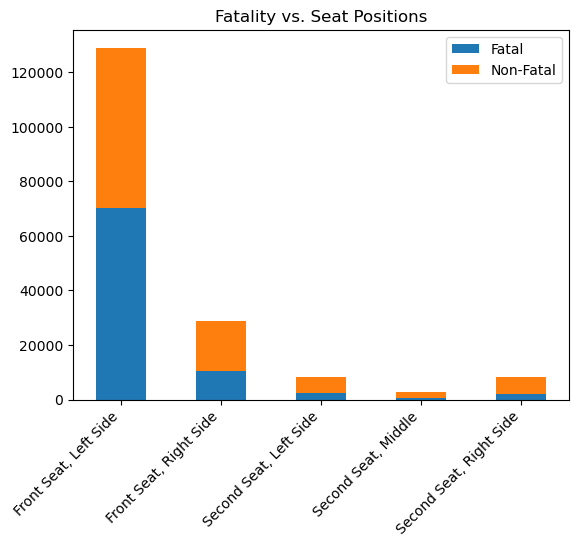

In [27]:
#x labels for bar plot
x_labels = df_seat_pos["Seat Pos"].unique()
x_labels.sort()

#get the counts of fatal and non fatal for each seat position
y_data = {
    "Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in x_labels],
    "Non-Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == False)]) for pos in x_labels]
}

width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, counts in y_data.items():
    ax.bar(x_labels, counts, width, label = boolean, bottom = bottom)
    bottom += counts

plt.xticks(rotation = 45, ha='right')
plt.title("Fatality vs. Seat Positions")
plt.legend(loc = "upper right")
plt.show()


<h4>Pie Chart Comparing Proportions of Fatality For Each Seat Position</h4>

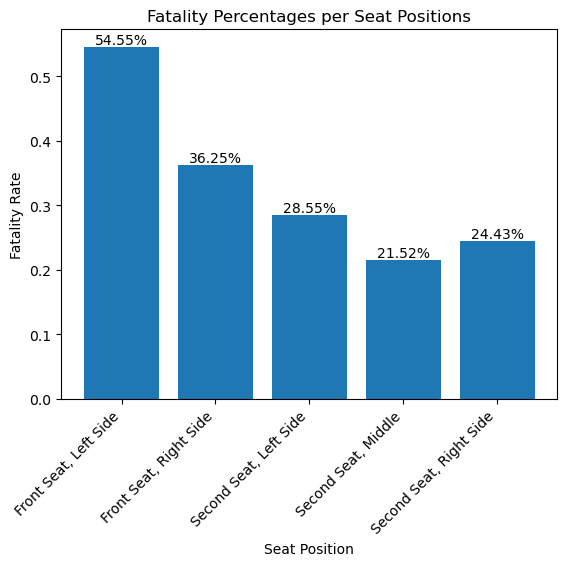

In [28]:
#xlabels for pie chart
x_labels = df_seat_pos["Seat Pos"].unique()
x_labels.sort()

#get the counts of fatal for each seat position and the total
fatals = [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in x_labels]
totals = [len(df_seat_pos[df_seat_pos["Seat Pos"] == pos]) for pos in x_labels]

#get the fatality proportions for each seat positions
fatal_proportions = [fatal/total for fatal, total in zip(fatals, totals)]

#plot the chart
plt.bar(x_labels, fatal_proportions)
plt.title("Fatality Percentages per Seat Positions")
plt.xticks(x_labels, rotation = 45, ha = "right")
plt.xlabel("Seat Position")
plt.ylabel("Fatality Rate")

# Add labels on bars
for i, value in enumerate(fatal_proportions):
    plt.text(i, value, f'{value*100:.2f}%', ha='center',va='bottom')

plt.show()



<h3>2b. Chisquare Test of Homogeneity for Proportions</h3>

In [29]:
# Here, we want to see if the proportion of survival/fatality rates are the same.
# Null hypothesis: The Fatality rate is the same across the different seat positions
# Alternate Hypothesis: The Fatality rate is different across the different seat positions

observed = [
    y_data["Fatal"],
    y_data["Non-Fatal"]
]

results = st.chi2_contingency(observed)
print(f"The expected value table is: ", results.expected_freq)
print(f"The p value is: ", results.pvalue)

# plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
# sns.heatmap(observed, annot=True, cmap="YlGnBu", fmt="d")  # d for integer formatting in annotations
# plt.title("Contingency Table Heatmap")
# plt.xlabel("Columns")  # Label for the x-axis
# plt.ylabel("Rows")  # Label for the y-axis
# plt.show()


The expected value table is:  [[62492.51896388 13951.99171602  4008.50242982  1330.51464672
   3962.47224357]
 [66483.48103612 14843.00828398  4264.49757018  1415.48535328
   4215.52775643]]
The p value is:  0.0


<h4>Because the p value is 0, we can reject the null hypothesis and use our data as evidence that the survival rate is different across the different seat positions</h4>

<h3>2c. Pairwise comparision of Fatality rates across all seat positions, Two Proportion Z Test</h3>

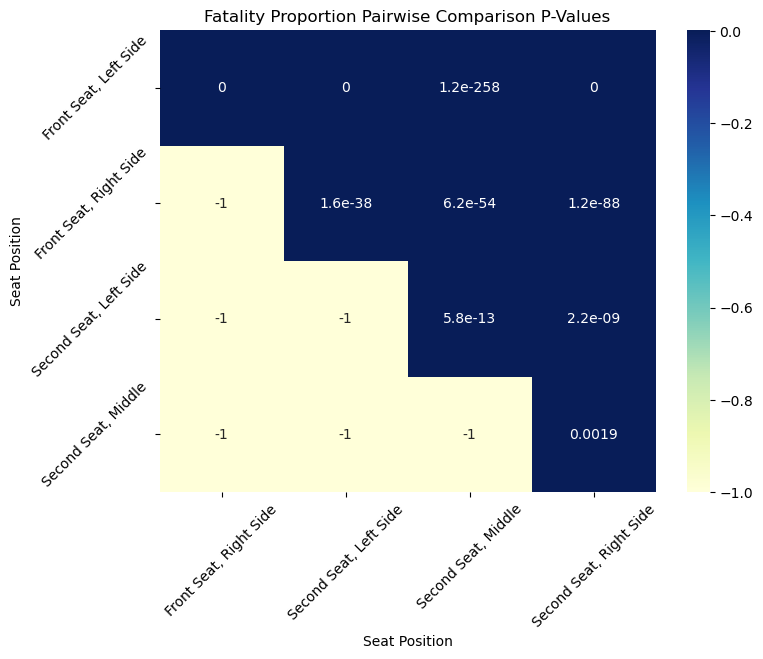

In [30]:
from statsmodels.stats.proportion import proportions_ztest
#seat_labels
seat_labels = df_seat_pos["Seat Pos"].unique()
seat_labels.sort()

#get the counts of fatal and non fatal for each seat position
y_data = {
    "Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in seat_labels],
    "Non-Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == False)]) for pos in seat_labels]
}

fatal_data = y_data["Fatal"]
non_fatal_data = y_data["Non-Fatal"]

row_comparisons = []
for i in range(len(fatal_data) - 1):
    comparisons = [-1 for i in range(len(fatal_data) - 1)]
    for j in range(i + 1, len(fatal_data)):

        # counts of 'success' for first seat position
        nob1 = fatal_data[i] + non_fatal_data[i]
        p1_counts = fatal_data[i]

        # counts of 'success' for second seat position
        nob2 = fatal_data[j] + non_fatal_data[j]
        p2_counts = fatal_data[j]

        # combined the successes in the seat positions
        nobs = np.asarray([nob1, nob2])
        counts = np.asarray([p1_counts, p2_counts])

        # perform 2 proportion z test
        stat, pval = proportions_ztest(counts, nobs)

        # store the pvalue in the array
        comparisons[j - 1] = pval
    
    row_comparisons.append(comparisons)

fig = plt.figure(figsize= (8, 6))

sns.heatmap(row_comparisons, annot = True, cmap="YlGnBu")
plt.title("Fatality Proportion Pairwise Comparison P-Values")
plt.xlabel("Seat Position")
plt.xticks([x+.5 for x in range(4)], seat_labels[1:], rotation = 45)
plt.ylabel("Seat Position")
plt.yticks([x + .5 for x in range(4)], seat_labels[:-1], rotation = 45)
plt.show()




<h1>3. General Fatality Trends</h1>

1a. Fatal cases over time.